In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

In [85]:
fpt_path = '/content/drive/MyDrive/Dự đoán giá cổ phiếu/FPT.csv'
msn_path = '/content/drive/MyDrive/Dự đoán giá cổ phiếu/MSN.csv'
pnj_path = '/content/drive/MyDrive/Dự đoán giá cổ phiếu/PNJ.csv'
vic_path = '/content/drive/MyDrive/Dự đoán giá cổ phiếu/VIC.csv'

In [86]:
# Đọc dữ liệu từ 4 file CSV vào DataFrame
fpt = pd.read_csv(fpt_path)
msn = pd.read_csv(msn_path)
pnj = pd.read_csv(pnj_path)
vic = pd.read_csv(vic_path)

In [87]:
# Danh sách các data_Frame
data_frames = [fpt, msn, pnj, vic]

# Kết hợp các data_Frame theo chiều 
data_df = pd.concat(data_frames)

# Đặt lại chỉ số của DataFrame đã được kết hợp
data_df.reset_index(drop=True, inplace=True)

# Đổi tên các cột để phù hợp với định dạng mong muốn
data_df.columns = ['Ticker', 'Date/Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest']


In [88]:
data_df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...,...
459330,VIC,12/22/2020 14:22,105.80,105.80,105.70,105.70,1870,0
459331,VIC,12/22/2020 14:23,105.70,105.70,105.70,105.70,2510,0
459332,VIC,12/22/2020 14:24,105.70,105.70,105.70,105.70,3620,0
459333,VIC,12/22/2020 14:25,105.70,105.70,105.70,105.70,100,0


In [89]:
# Chuyển đổi cột Date/Time về dạng chuẩn 
data_df['Date/Time'] = pd.to_datetime(data_df['Date/Time'])

# Kiểm tra 
print(data_df['Date/Time'].head())


0   2018-12-25 09:15:00
1   2018-12-25 09:16:00
2   2018-12-25 09:17:00
3   2018-12-25 09:18:00
4   2018-12-25 09:19:00
Name: Date/Time, dtype: datetime64[ns]


In [90]:
data_df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...,...
459330,VIC,2020-12-22 14:22:00,105.80,105.80,105.70,105.70,1870,0
459331,VIC,2020-12-22 14:23:00,105.70,105.70,105.70,105.70,2510,0
459332,VIC,2020-12-22 14:24:00,105.70,105.70,105.70,105.70,3620,0
459333,VIC,2020-12-22 14:25:00,105.70,105.70,105.70,105.70,100,0


# EDA

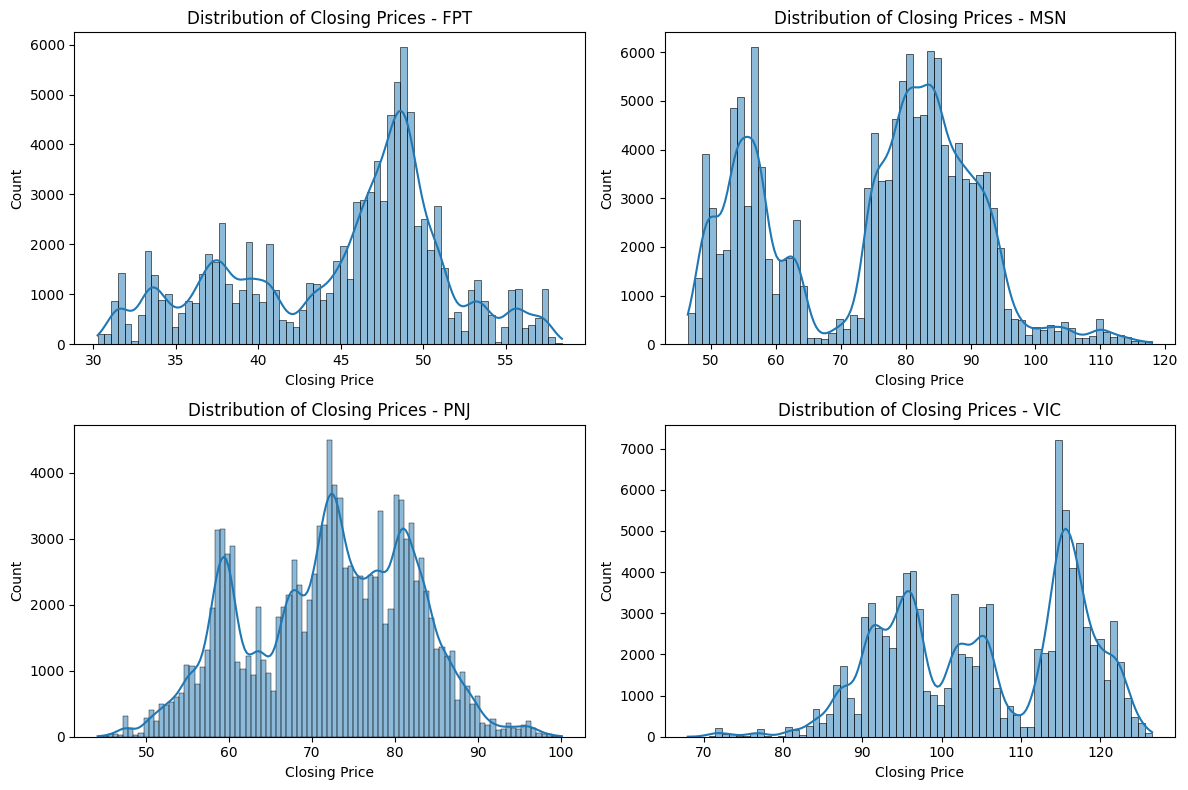

In [91]:
# Tạo subplot cho mỗi cổ phiếu
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Vẽ biểu đồ phân phối giá đóng cửa cho từng cổ phiếu trong các subplot riêng biệt
for i, ticker in enumerate(['FPT', 'MSN', 'PNJ', 'VIC']):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    stock_data = data_df[data_df['Ticker'] == ticker]
    sns.histplot(stock_data, x='Close', ax=ax, kde=True)
    ax.set_xlabel('Closing Price')
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of Closing Prices - {ticker}')

# Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

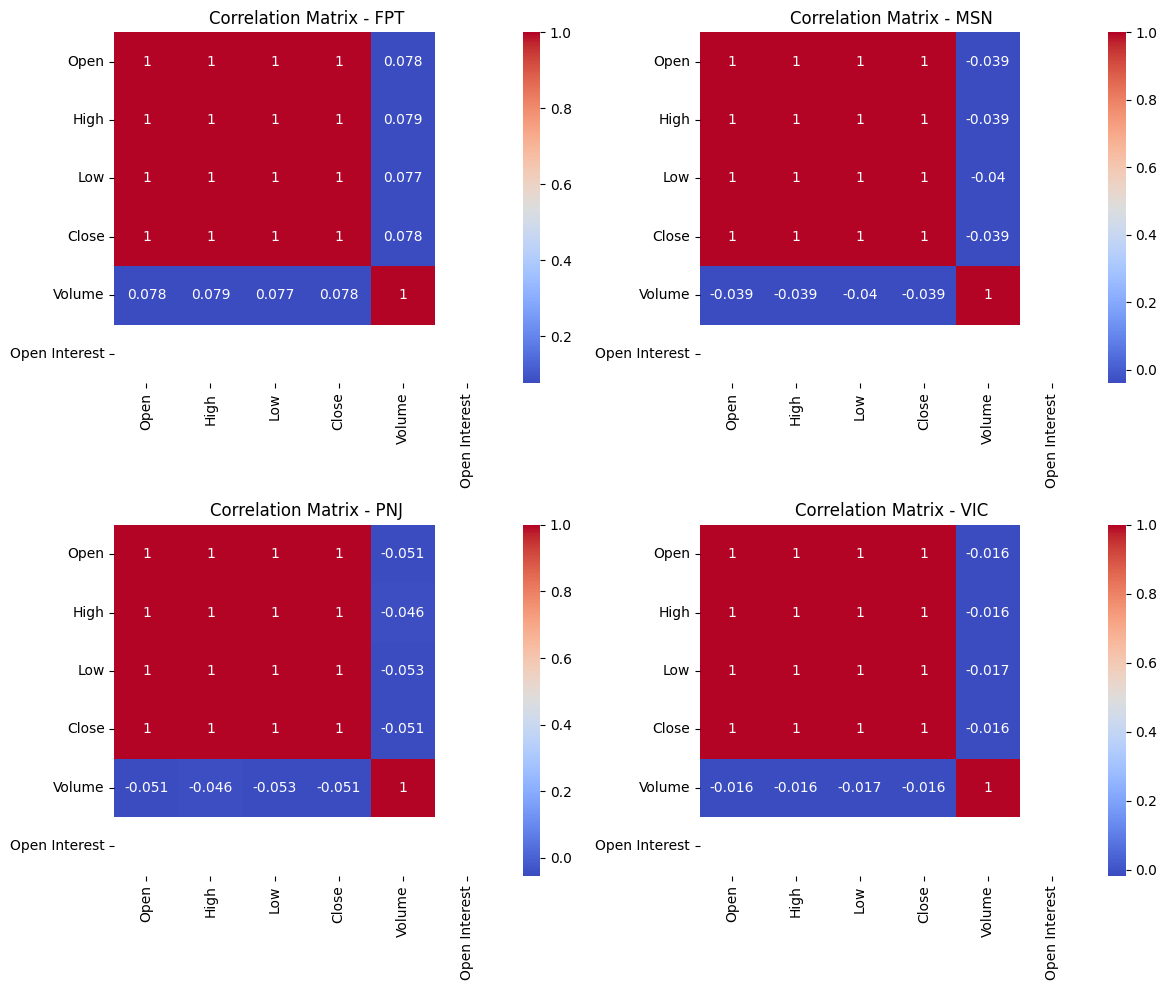

In [92]:
# Tạo ma trận tương quan cho từng cổ phiếu
corr_matrix_fpt = fpt[['Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest']].corr()
corr_matrix_msn = msn[['Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest']].corr()
corr_matrix_pnj = pnj[['Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest']].corr()
corr_matrix_vic = vic[['Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest']].corr()

# Tạo figure và subplot cho mỗi cổ phiếu
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Vẽ biểu đồ tương quan cho cổ phiếu FPT
sns.heatmap(corr_matrix_fpt, annot=True, cmap='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Correlation Matrix - FPT')

# Vẽ biểu đồ tương quan cho cổ phiếu MSN
sns.heatmap(corr_matrix_msn, annot=True, cmap='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Correlation Matrix - MSN')

# Vẽ biểu đồ tương quan cho cổ phiếu PNJ
sns.heatmap(corr_matrix_pnj, annot=True, cmap='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Correlation Matrix - PNJ')

# Vẽ biểu đồ tương quan cho cổ phiếu VIC
sns.heatmap(corr_matrix_vic, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Matrix - VIC')

# Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

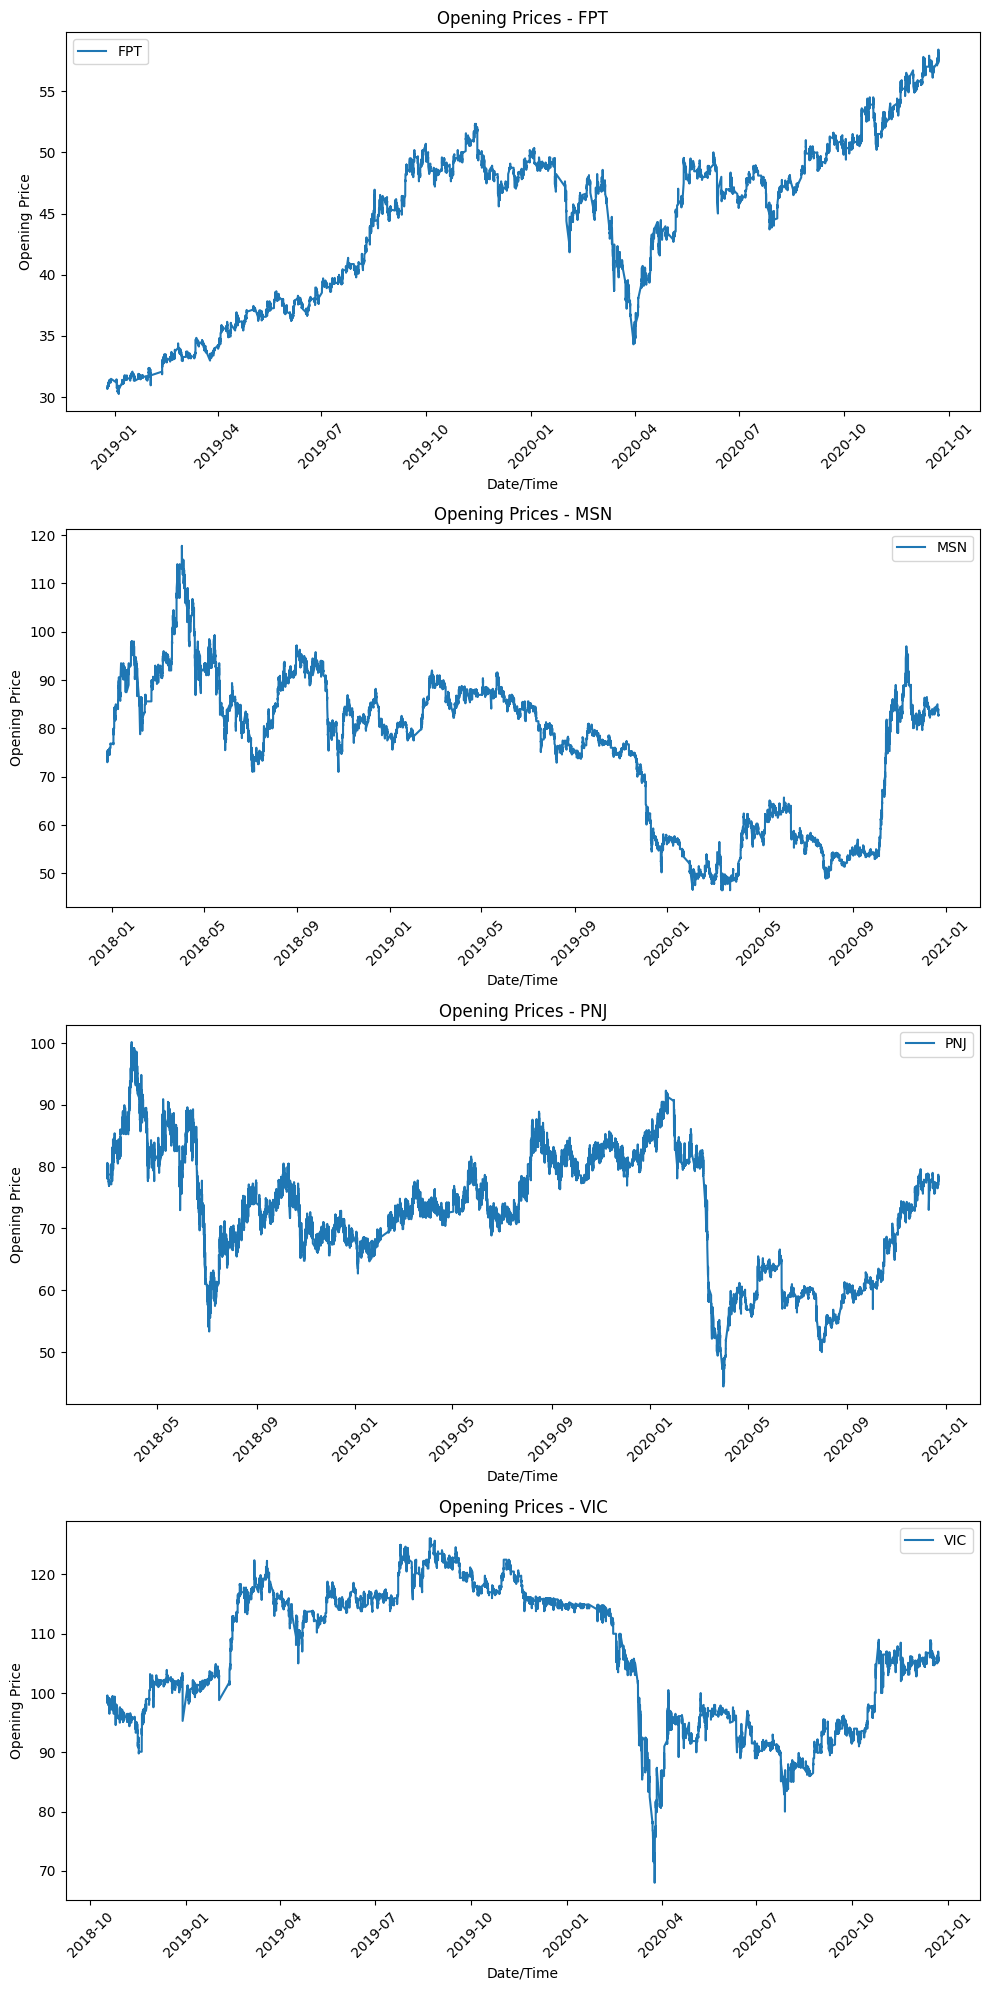

In [93]:
# Tạo các ô con cho từng cổ phiếu
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20))

# Vẽ biểu đồ giá mở cửa cho từng cổ phiếu trong các subplot riêng biệt
for i, ticker in enumerate(['FPT', 'MSN', 'PNJ', 'VIC']):
    stock_data = data_df[data_df['Ticker'] == ticker]
    ax = axes[i]
    ax.plot(stock_data['Date/Time'], stock_data['Open'])
    ax.set_xlabel('Date/Time')
    ax.set_ylabel('Opening Price')
    ax.set_title(f'Opening Prices - {ticker}')
    ax.tick_params(axis='x', rotation=45)
    ax.legend([ticker])

# Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

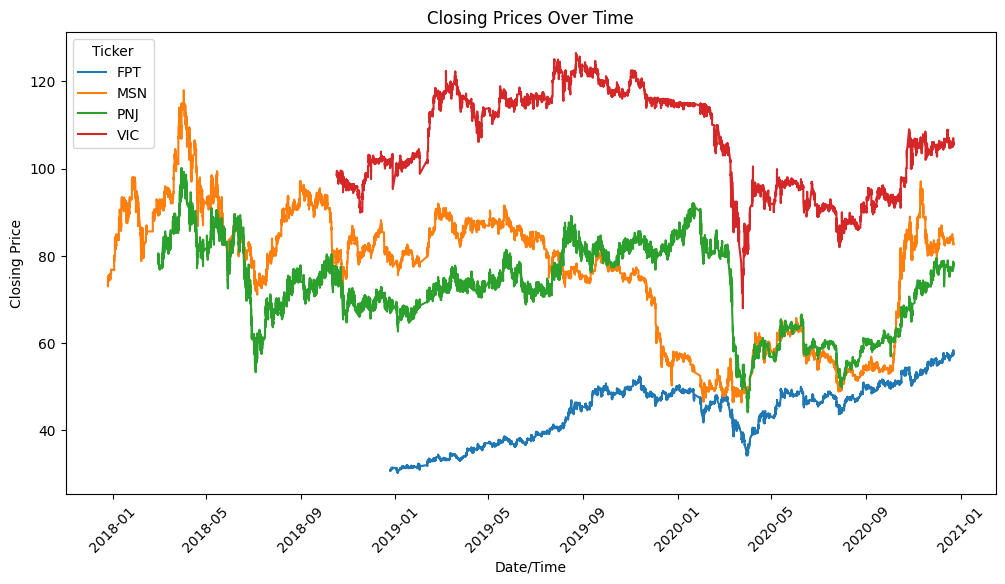

In [94]:
# Biểu đồ giá trị đóng cửa (Close) theo thời gian
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_df, x='Date/Time', y='Close', hue='Ticker')
plt.xlabel('Date/Time')
plt.ylabel('Closing Price')
plt.title('Closing Prices Over Time')
plt.xticks(rotation=45)
plt.show()

# Áp Dụng mô hình dự đoán

In [95]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459335 entries, 0 to 459334
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Ticker         459335 non-null  object        
 1   Date/Time      459335 non-null  datetime64[ns]
 2   Open           459335 non-null  float64       
 3   High           459335 non-null  float64       
 4   Low            459335 non-null  float64       
 5   Close          459335 non-null  float64       
 6   Volume         459335 non-null  int64         
 7   Open Interest  459335 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 28.0+ MB


RMSE: 463.66188180355425


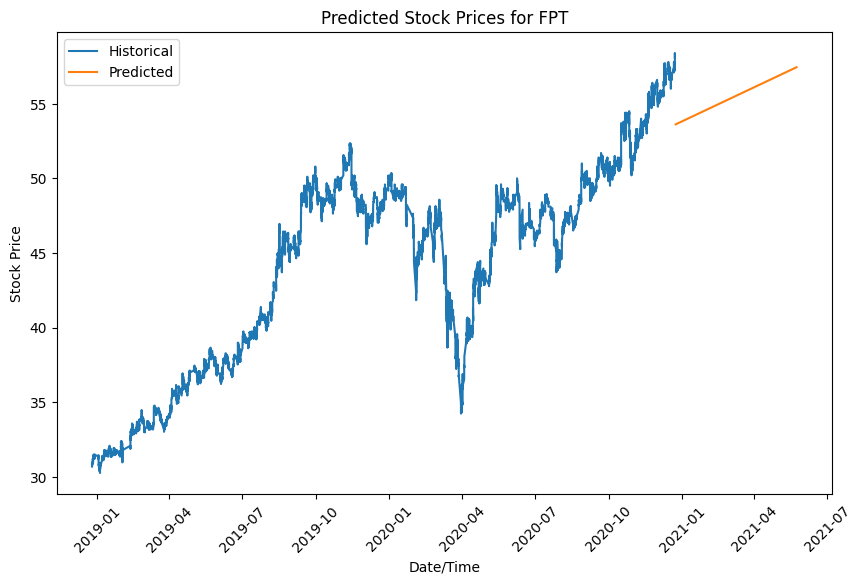

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame called 'data_df' with columns: 'Date/Time', 'Close', and 'Ticker'

# Lọc dữ liệu cho cổ phiếu FPT
fpt_data = data_df[data_df['Ticker'] == 'FPT']

# Chuẩn bị dữ liệu để huấn luyện
X = fpt_data['Date/Time'].values.reshape(-1, 1).astype(np.int64) // 10**9
y = fpt_data['Close'].values

# Chia dữ liệu thành các tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Chuyển đổi X_test thành giá trị số
X_test_numeric = X_test.astype(np.int64) // 10**9

# Đưa ra dự đoán cho tập kiểm tra
y_pred = model.predict(X_test_numeric)

# Tính sai số bình phương trung bình gốc (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

# Tạo ngày trong 5 tháng tới
start_date = data_df['Date/Time'].max() + pd.DateOffset(days=1)
end_date = start_date + pd.DateOffset(months=5)
future_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Chuyển đổi ngày trong tương lai thành giá trị số
future_dates_numeric = future_dates.astype(np.int64) // 10**9

# Chuyển đổi các giá trị số của ngày trong tương lai thành một mảng NumPy và định hình lại
future_dates_numeric = future_dates_numeric.to_numpy().reshape(-1, 1)

# Đưa ra dự đoán cho những ngày trong tương lai
future_predictions = model.predict(future_dates_numeric)

# Chuyển đổi các giá trị số trở lại định dạng ngày giờ
future_dates_predicted = pd.to_datetime(future_dates_numeric.flatten() * 10**9)

# Tạo DataFrame cho dữ liệu dự đoán
predicted_df = pd.DataFrame({'Date/Time': future_dates_predicted, 'Predicted': future_predictions})

# Vẽ dữ liệu dự đoán
plt.figure(figsize=(10, 6))
plt.plot(fpt_data['Date/Time'], fpt_data['Close'], label='Historical')
plt.plot(predicted_df['Date/Time'], predicted_df['Predicted'], label='Predicted')
plt.xlabel('Date/Time')
plt.ylabel('Stock Price')
plt.title('Predicted Stock Prices for FPT')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [97]:
print('RMSE:', rmse)

RMSE: 463.66188180355425


RMSE: 603.054884112193


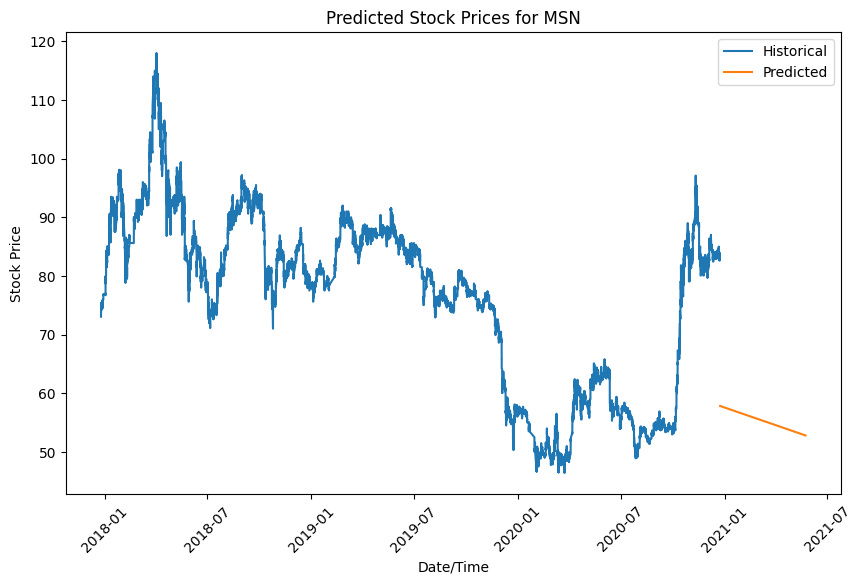

In [107]:
MSN_data = data_df[data_df['Ticker'] == 'MSN']

X = MSN_data['Date/Time'].values.reshape(-1, 1).astype(np.int64) // 10**9
y = MSN_data['Close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

X_test_numeric = X_test.astype(np.int64) // 10**9

y_pred = model.predict(X_test_numeric)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

start_date = data_df['Date/Time'].max() + pd.DateOffset(days=1)
end_date = start_date + pd.DateOffset(months=5)
future_dates = pd.date_range(start=start_date, end=end_date, freq='D')

future_dates_numeric = future_dates.astype(np.int64) // 10**9

future_dates_numeric = future_dates_numeric.to_numpy().reshape(-1, 1)

future_predictions = model.predict(future_dates_numeric)

future_dates_predicted = pd.to_datetime(future_dates_numeric.flatten() * 10**9)

predicted_df = pd.DataFrame({'Date/Time': future_dates_predicted, 'Predicted': future_predictions})

plt.figure(figsize=(10, 6))
plt.plot(MSN_data['Date/Time'], MSN_data['Close'], label='Historical')
plt.plot(predicted_df['Date/Time'], predicted_df['Predicted'], label='Predicted')
plt.xlabel('Date/Time')
plt.ylabel('Stock Price')
plt.title('Predicted Stock Prices for MSN')
plt.xticks(rotation=45)
plt.legend()
plt.show()

RMSE: 244.4078438934467


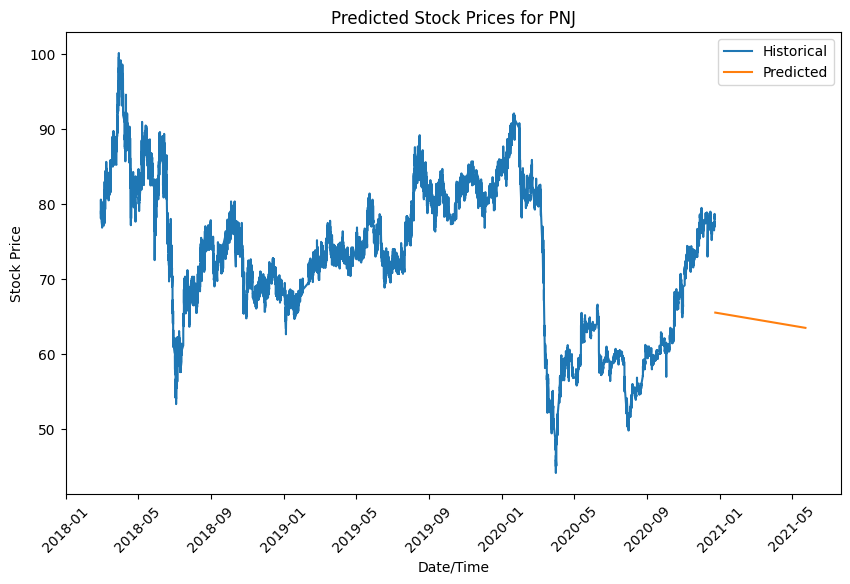

In [105]:
PNJ_data = data_df[data_df['Ticker'] == 'PNJ']

X = PNJ_data['Date/Time'].values.reshape(-1, 1).astype(np.int64) // 10**9
y = PNJ_data['Close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

X_test_numeric = X_test.astype(np.int64) // 10**9

y_pred = model.predict(X_test_numeric)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

start_date = data_df['Date/Time'].max() + pd.DateOffset(days=1)
end_date = start_date + pd.DateOffset(months=5)
future_dates = pd.date_range(start=start_date, end=end_date, freq='D')

future_dates_numeric = future_dates.astype(np.int64) // 10**9

future_dates_numeric = future_dates_numeric.to_numpy().reshape(-1, 1)

future_predictions = model.predict(future_dates_numeric)

future_dates_predicted = pd.to_datetime(future_dates_numeric.flatten() * 10**9)

predicted_df = pd.DataFrame({'Date/Time': future_dates_predicted, 'Predicted': future_predictions})

plt.figure(figsize=(10, 6))
plt.plot(PNJ_data['Date/Time'], PNJ_data['Close'], label='Historical')
plt.plot(predicted_df['Date/Time'], predicted_df['Predicted'], label='Predicted')
plt.xlabel('Date/Time')
plt.ylabel('Stock Price')
plt.title('Predicted Stock Prices for PNJ')
plt.xticks(rotation=45)
plt.legend()
plt.show()

RMSE: 394.4954208323814


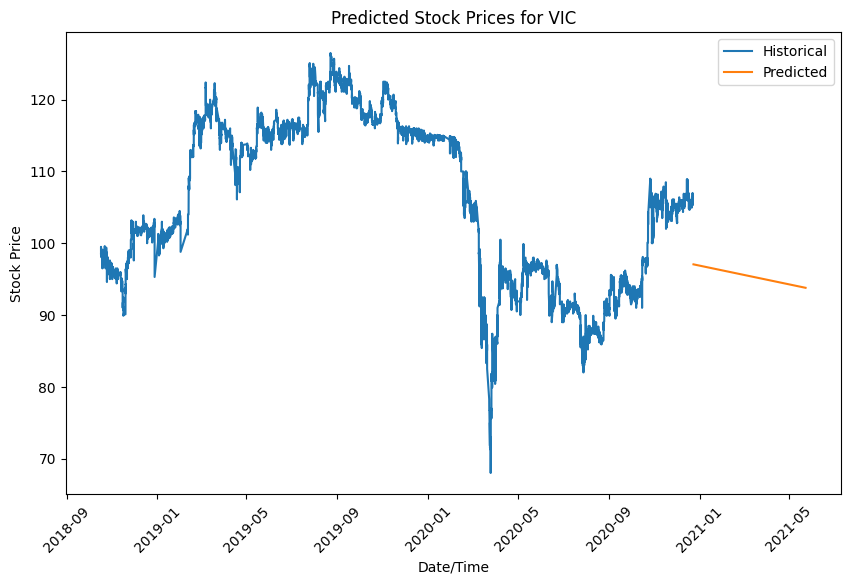

In [106]:
VIC_data = data_df[data_df['Ticker'] == 'VIC']

X = VIC_data['Date/Time'].values.reshape(-1, 1).astype(np.int64) // 10**9
y = VIC_data['Close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

X_test_numeric = X_test.astype(np.int64) // 10**9

y_pred = model.predict(X_test_numeric)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

start_date = data_df['Date/Time'].max() + pd.DateOffset(days=1)
end_date = start_date + pd.DateOffset(months=5)
future_dates = pd.date_range(start=start_date, end=end_date, freq='D')

future_dates_numeric = future_dates.astype(np.int64) // 10**9

future_dates_numeric = future_dates_numeric.to_numpy().reshape(-1, 1)

future_predictions = model.predict(future_dates_numeric)

future_dates_predicted = pd.to_datetime(future_dates_numeric.flatten() * 10**9)

predicted_df = pd.DataFrame({'Date/Time': future_dates_predicted, 'Predicted': future_predictions})

plt.figure(figsize=(10, 6))
plt.plot(VIC_data['Date/Time'], VIC_data['Close'], label='Historical')
plt.plot(predicted_df['Date/Time'], predicted_df['Predicted'], label='Predicted')
plt.xlabel('Date/Time')
plt.ylabel('Stock Price')
plt.title('Predicted Stock Prices for VIC')
plt.xticks(rotation=45)
plt.legend()
plt.show()